### Load the dataset

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/complaints.csv')

# Display basic info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Display column names
print("\nColumns:", df.columns.tolist())

C:\Users\zyona\AppData\Local\Temp\ipykernel_18680\3613877866.py:4: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/complaints.csv')


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memo

### Initial EDA

In [3]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64


In [4]:
print("\nUnique Products:")
print(df['Product'].value_counts())


Unique Products:
Product
Credit reporting or other personal consumer reports                             4834855
Credit reporting, credit repair services, or other personal consumer reports    2163857
Debt collection                                                                  799197
Mortgage                                                                         422254
Checking or savings account                                                      291178
Credit card                                                                      226686
Credit card or prepaid card                                                      206369
Money transfer, virtual currency, or money service                               145066
Credit reporting                                                                 140429
Student loan                                                                     109717
Bank account or service                                                           86205
Vehicl

### Analyze Distribution of Complaints Across Products

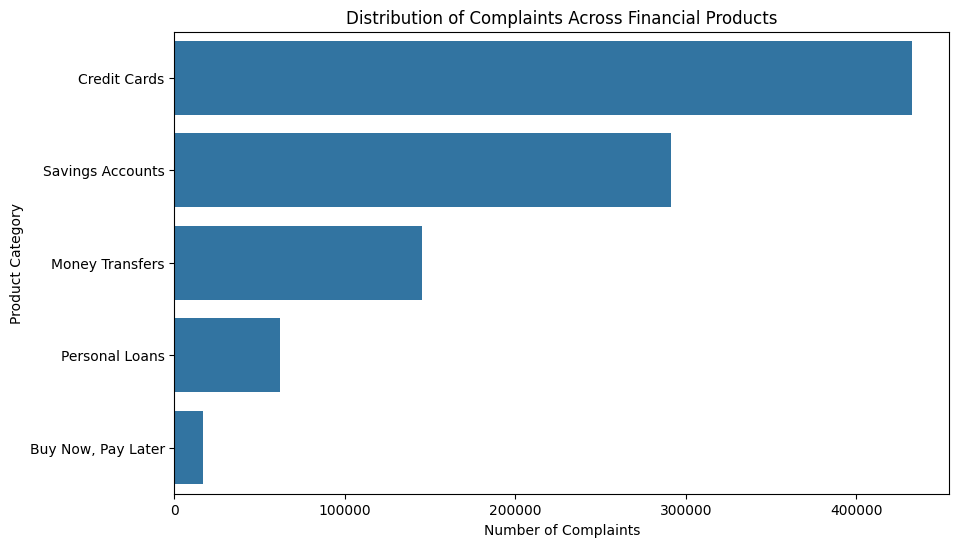


Complaint Counts by Category:
Category
Credit Cards          433055
Savings Accounts      291178
Money Transfers       145066
Personal Loans         62215
Buy Now, Pay Later     16514
Name: count, dtype: int64


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define target products based on EDA
target_products = [
    'Credit card',
    'Credit card or prepaid card',
    'Consumer Loan',
    'Payday loan, title loan, or personal loan',
    'Payday loan, title loan, personal loan, or advance loan',
    'Checking or savings account',
    'Money transfer, virtual currency, or money service'
]

# Map dataset product names to project categories for clarity
product_mapping = {
    'Credit card': 'Credit Cards',
    'Credit card or prepaid card': 'Credit Cards',
    'Consumer Loan': 'Personal Loans',
    'Payday loan, title loan, or personal loan': 'Personal Loans',
    'Payday loan, title loan, personal loan, or advance loan': 'Buy Now, Pay Later',
    'Checking or savings account': 'Savings Accounts',
    'Money transfer, virtual currency, or money service': 'Money Transfers'
}

# Filter dataset for target products
df_target = df[df['Product'].isin(target_products)].copy()

# Map product names to project categories
df_target['Category'] = df_target['Product'].map(product_mapping)

# Plot distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Category', data=df_target, order=df_target['Category'].value_counts().index)
plt.title('Distribution of Complaints Across Financial Products')
plt.xlabel('Number of Complaints')
plt.ylabel('Product Category')
plt.savefig('../reports/product_distribution.png')
plt.show()

# Print summary for verification
print("\nComplaint Counts by Category:")
print(df_target['Category'].value_counts())

### Calculating word count


Narrative Length Statistics:
count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: narrative_length, dtype: float64


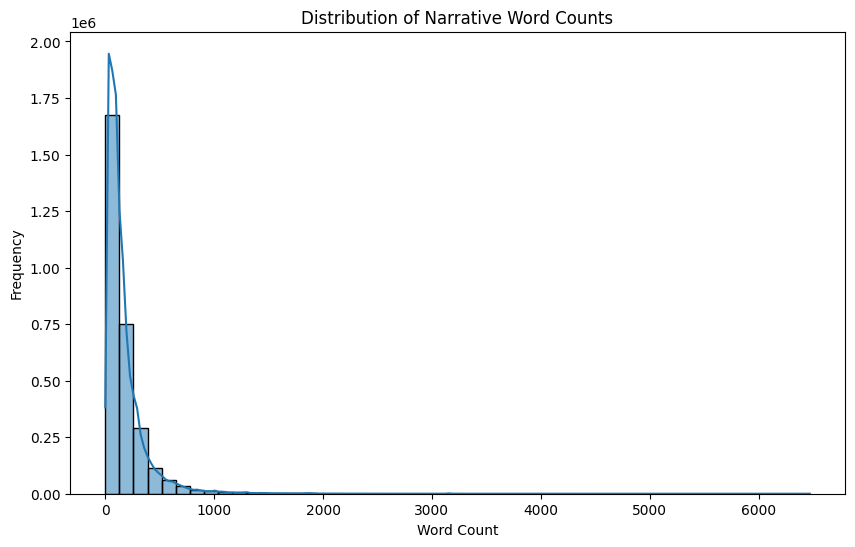

In [7]:
# Calculate word count
df['narrative_length'] = df['Consumer complaint narrative'].dropna().apply(lambda x: len(str(x).split()))

# Summary statistics
print("\nNarrative Length Statistics:")
print(df['narrative_length'].describe())

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['narrative_length'].dropna(), bins=50, kde=True)
plt.title('Distribution of Narrative Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.savefig('../reports/narrative_length_histogram.png')
plt.show()

### Identify complaints with/without narratives

In [8]:
print("\nComplaints with Narratives:")
print(f"Total Complaints: {len(df)}")
print(f"With Narrative: {df['Consumer complaint narrative'].notnull().sum()}")
print(f"Without Narrative: {df['Consumer complaint narrative'].isnull().sum()}")


Complaints with Narratives:
Total Complaints: 9609797
With Narrative: 2980756
Without Narrative: 6629041


### Filter Dataset

In [9]:
# Filter for target products and non-empty narratives
df_filtered = df[
    (df['Product'].isin(target_products)) &
    (df['Consumer complaint narrative'].notnull()) &
    (df['Consumer complaint narrative'].str.strip() != '')
]

print("\nFiltered Dataset Size:")
print(len(df_filtered))


Filtered Dataset Size:
462436


### Clean Text Narratives

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove boilerplate 
    boilerplate = ['i am writing to file a complaint', 'please assist']
    for phrase in boilerplate:
        text = text.replace(phrase, '')
    return text

# Apply cleaning
df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)

# Verify cleaning
print("\nSample Cleaned Narratives:")
print(df_filtered[['Consumer complaint narrative', 'cleaned_narrative']].head())

C:\Users\zyona\AppData\Local\Temp\ipykernel_18680\2401061912.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cleaned_narrative'] = df_filtered['Consumer complaint narrative'].apply(clean_text)



Sample Cleaned Narratives:
                            Consumer complaint narrative  \
12237  A XXXX XXXX card was opened under my name by a...   
12532  I made the mistake of using my wellsfargo debi...   
13280  Dear CFPB, I have a secured credit card with c...   
13506  I have a Citi rewards cards. The credit balanc...   
13955  b'I am writing to dispute the following charge...   

                                       cleaned_narrative  
12237  a xxxx xxxx card was opened under my name by a...  
12532  i made the mistake of using my wellsfargo debi...  
13280  dear cfpb i have a secured credit card with ci...  
13506  i have a citi rewards cards the credit balance...  
13955  bi am writing to dispute the following charges...  


### Save filtered data

In [11]:
df_filtered.to_csv('../data/filtered_complaints.csv', index=False)
print("\nSaved filtered dataset to '../data/filtered_complaints.csv'")


Saved filtered dataset to '../data/filtered_complaints.csv'
